# Programming Assignment

Data: https://archive.ics.uci.edu.

Instruction: Choose a dataset and perform a data storytelling, choose the proper data visualization, do not use words, your graphs must tell a story.

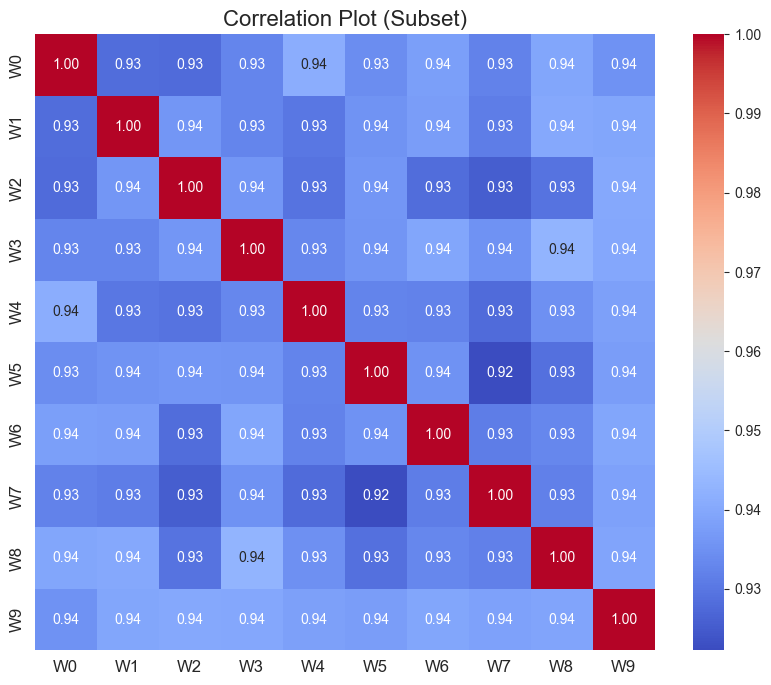

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, leaves_list

# Load the dataset
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Approach 1: Limit the Number of Variables
def plot_limited_variables(corr_matrix, num_vars=10):
    subset_columns = numeric_columns.iloc[:, :num_vars]
    corr_matrix_subset = subset_columns.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Plot (Subset)', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Approach 2: Filter by Strong Correlations
def plot_strong_correlations(corr_matrix, threshold=0.5):
    strong_corr_matrix = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

    plt.figure(figsize=(10, 8))
    sns.heatmap(strong_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, mask=strong_corr_matrix.isnull())
    plt.title('Correlation Plot (Strong Correlations)', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Approach 3: Hierarchical Clustering
def plot_hierarchical_clustering(corr_matrix):
    # Create a dendrogram to cluster the variables
    plt.figure(figsize=(10, 8))
    dendrogram = sch.dendrogram(sch.linkage(corr_matrix, method='ward'))
    plt.title('Dendrogram', fontsize=16)
    plt.xlabel('Variables', fontsize=12)
    plt.ylabel('Euclidean distances', fontsize=12)
    plt.show()

    # Reorder the correlation matrix according to the hierarchical clustering
    dists = squareform(1 - corr_matrix.abs())
    linkage_matrix = linkage(dists, method='average')
    ordered_indices = leaves_list(linkage_matrix)

    ordered_corr_matrix = corr_matrix.iloc[ordered_indices, ordered_indices]

    plt.figure(figsize=(10, 8))
    sns.heatmap(ordered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Plot (Hierarchical Clustering)', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Uncomment the approach you want to use

# Approach 1: Limit the Number of Variables
plot_limited_variables(corr_matrix, num_vars=10)

# Approach 2: Filter by Strong Correlations
# plot_strong_correlations(corr_matrix, threshold=0.5)

# Approach 3: Hierarchical Clustering
# plot_hierarchical_clustering(corr_matrix)


c:\Users\Zen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


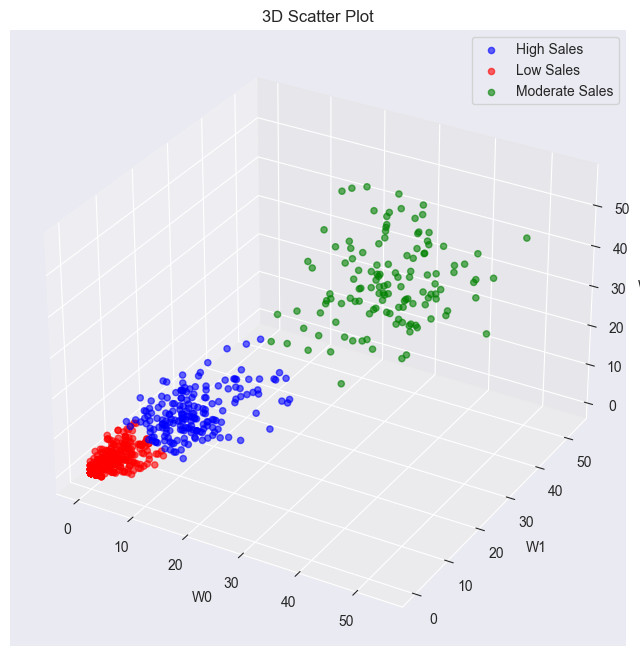

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

# Select features for clustering
features = ['W0', 'W1', 'W2']
X = df[features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Define meaningful names for clusters based on characteristics
# This is just an example, you should analyze your data to assign meaningful names
cluster_names = {
    0: 'Low Sales',
    1: 'Moderate Sales',
    2: 'High Sales'
}

# Map cluster labels to the cluster column
df['cluster_name'] = df['cluster'].map(cluster_names)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters with meaningful labels
colors = ['r', 'g', 'b']
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    ax.scatter(cluster_data['W0'], cluster_data['W1'], cluster_data['W2'], c=colors[cluster], label=cluster_names[cluster], alpha=0.6)

ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('W2')
ax.set_title('3D Scatter Plot')
ax.legend()

plt.show()


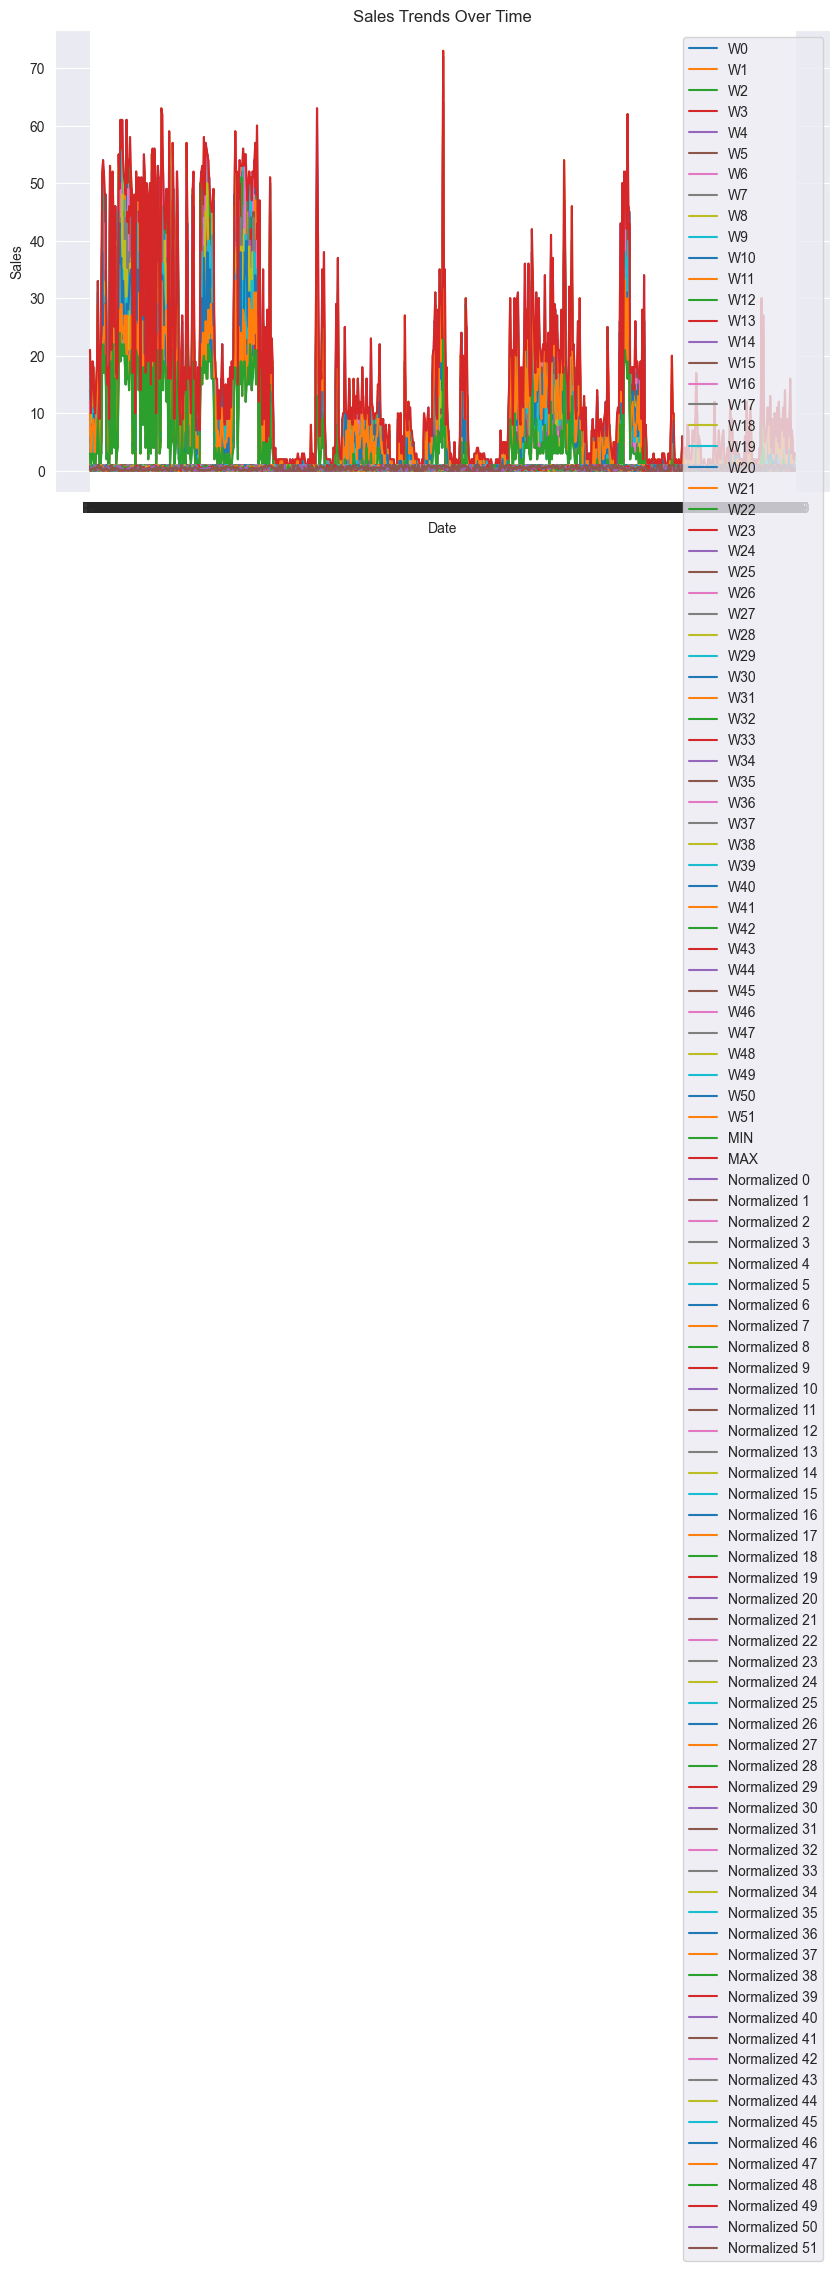

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df[df.columns[0]], df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()


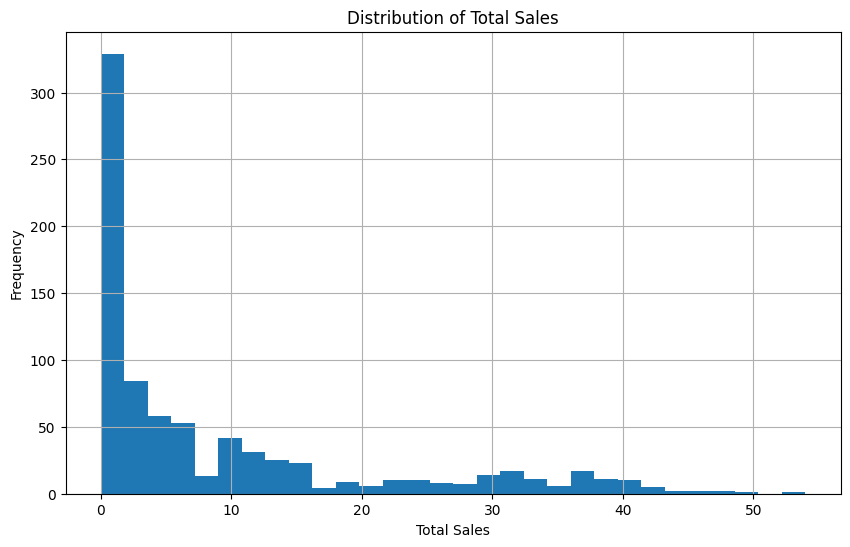

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

plt.figure(figsize=(10, 6))
df[df.columns[1]].hist(bins=30)
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales')
plt.grid(True)
plt.show()


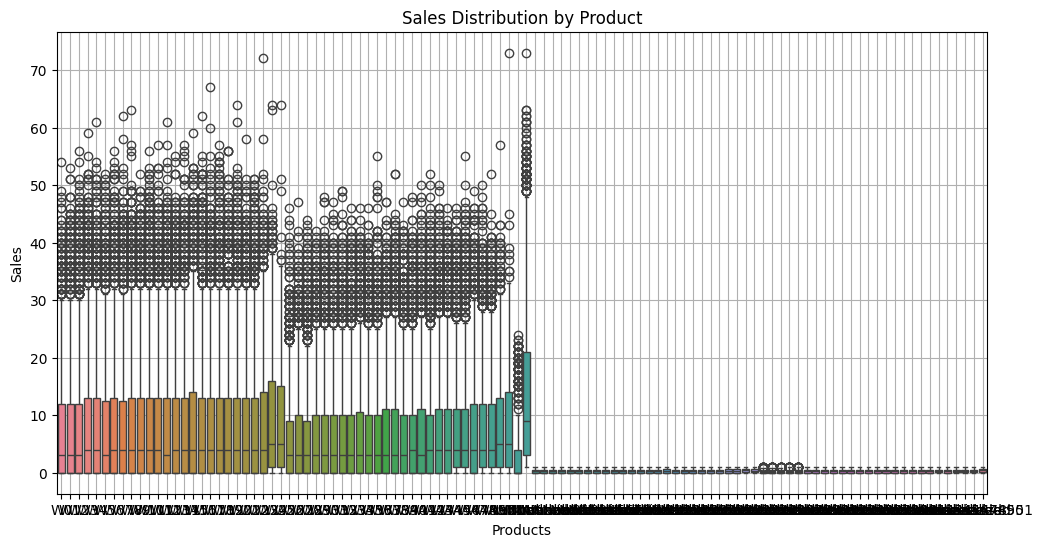

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:])
plt.xlabel('Products')
plt.ylabel('Sales')
plt.title('Sales Distribution by Product')
plt.grid(True)
plt.show()


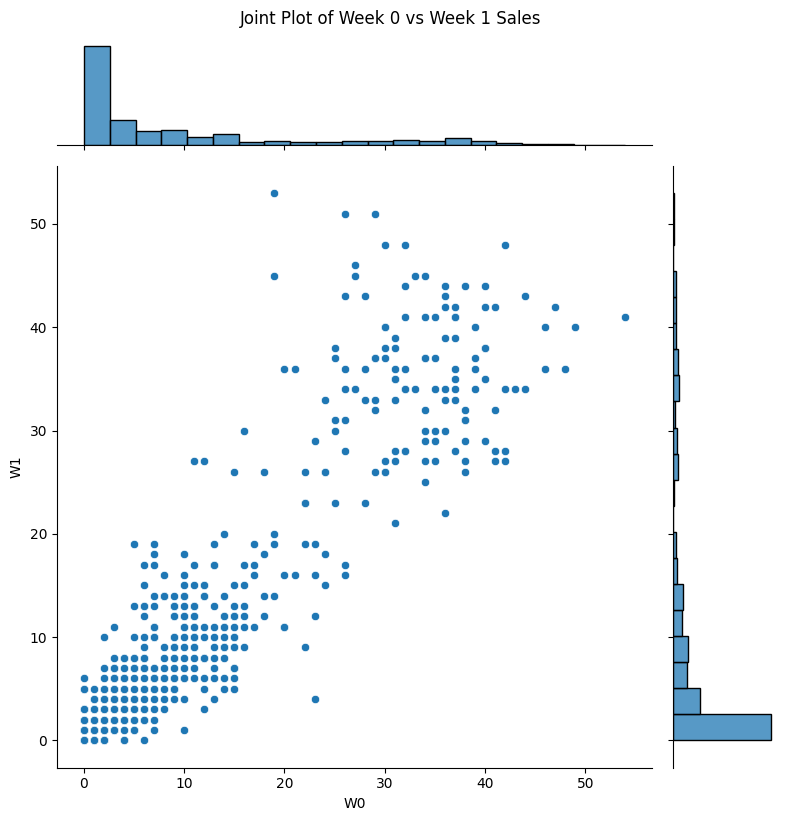

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

sns.jointplot(x='W0', y='W1', data=df, kind='scatter', height=8)
plt.suptitle('Joint Plot of Week 0 vs Week 1 Sales', y=1.02)
plt.show()


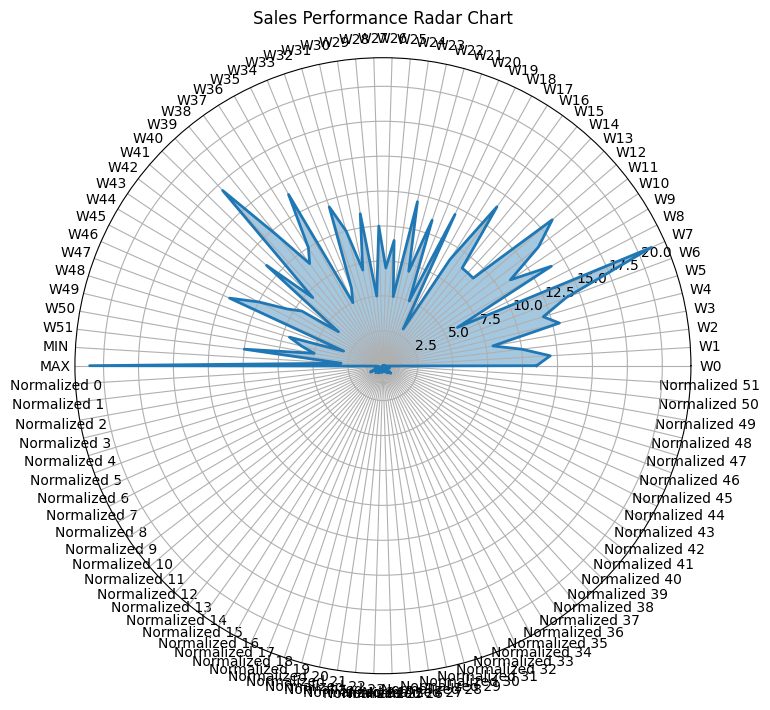

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

data = df.iloc[0, 1:].values
categories = df.columns[1:]

N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories)

ax.plot(angles, np.append(data, data[0]), linewidth=2, linestyle='solid')

ax.fill(angles, np.append(data, data[0]), alpha=0.4)

plt.title('Sales Performance Radar Chart')
plt.show()
